In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.drop('target', axis=1)

In [4]:
# PCA calculations

n_components = 2

# Centering data
X_meaned = X.sub(X.mean(axis=0), axis=1)

# Calculate covariance matrix    
cov_mat = np.cov(X_meaned, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

# Sort eigenvalues and associated eigenvectors
idx = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[idx]
sorted_eigenvectors = eigen_vectors[:, idx]

# Keep n components
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

# Reduce dimensions to n components 
X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

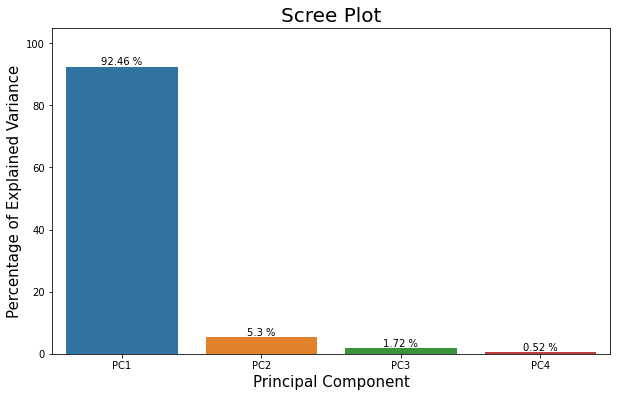

In [5]:
total_variance = sorted_eigenvalue / sorted_eigenvalue.sum() * 100

PC = [f'PC{i}' for i in range(1, len(total_variance) + 1)]

plt.figure(figsize=(10, 6))
sns.barplot(x=PC, y=total_variance)

for i in range(len(total_variance)):
    pct = str(round(total_variance[i], 2)) + ' %'
    plt.text(i, total_variance[i], pct, ha='center', va='bottom')
 
plt.ylim([0, 105]) 
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Scree Plot', fontsize=20)
   
plt.show()

In [6]:
PC = [f'PC{i}' for i in range(1, n_components + 1)]
PCA_data = pd.DataFrame(X_reduced, columns=PC)
PCA_data_com = pd.concat([PCA_data, data['target']], axis=1)
PCA_data_com

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


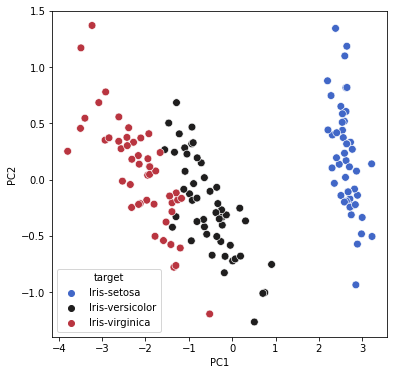

In [7]:
plt.figure(figsize = (6,6))
sns.scatterplot(data=PCA_data_com, x='PC1', y='PC2', hue='target', s=60, palette='icefire')
plt.show()